# TP5

In [37]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Exercice 1

Appliquons le Gaussian Naîve Bayes

In [1]:
df=load_breast_cancer()
df_col_name=list(df.feature_names)
df_col_name.append('target')
#df_col_name.append('target_names')
data=pd.DataFrame(np.c_[df.data,df.target],columns=df_col_name)
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

Vérifier s’il y a des valeurs manquantes dans les échantillons. Ici, on va afficher le nombre de valeurs manquantes pour chaque caractéristique.

In [2]:
print(data.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


Affichons les différentes catégories possibles pour une caractéristique donnée. Affichons les types de cancerts

In [3]:
print(data['target'].unique())

[0. 1.]


Application du Gaussian Naîve Bayes

Séparons les données en: entrées (les caractéristiques) et sorties (les types de cancert: benign ou malignant). Dans notre fichier, le type de cancert (qui sont le résultat attendu) sont dans la colonne 31, et les autres caractéristiques (les entrées) sont dans les colonnes restantes.

In [4]:
X = data.iloc[:,:30] #les caractéristiques
y = data.iloc[:,30]  #les résulats (type de cancer)

Séparons les données en deux parties: une pour l’entrainement (on prend 80%) et une pour le test (on prend 20%). On va utiliser train_test_split de scikit-learn.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
from sklearn.naive_bayes import GaussianNB
modele = GaussianNB()
modele.fit(X_train, y_train)

C:\logiciels\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


GaussianNB()

Prédiction

In [7]:
y_pred = modele.predict(X_test)

C:\logiciels\anaconda\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


Testons la précision du modèle

In [8]:
from sklearn.metrics import accuracy_score
print( "précision: ", accuracy_score(y_test, y_pred))

précision:  0.9385964912280702


In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[40,  6],
       [ 1, 67]], dtype=int64)


# Exercice 2

Appliquez le Gaussian Naîve Bayes sur l’ensemble des données pima-indians-diabetes.data.csv

In [10]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.pandas.read_csv(url, names=names)

In [11]:
df

preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]

Vérifier s’il y a des valeurs manquantes dans les échantillons. Ici, on va afficher le nombre de valeurs manquantes pour chaque caractéristique

In [12]:
print(df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


Application du Gaussian Naîve Bayes

Séparons les données en: entrées (les caractéristiques) et sorties (les types de cancert: benign ou malignant). Dans notre fichier, le type de cancert (qui sont le résultat attendu) sont dans la colonne 31, et les autres caractéristiques (les entrées) sont dans les colonnes restantes.

In [13]:
X = df.iloc[:,:8] #les caractéristiques
y = df.iloc[:,8]  #les résulats (type de cancer)

Séparons les données en deux parties: une pour l’entrainement (on prend 80%) et une pour le test (on prend 20%). On va utiliser train_test_split de scikit-learn.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.naive_bayes import GaussianNB
modele = GaussianNB()
modele.fit(X_train, y_train)

GaussianNB()

Prédiction

In [16]:
y_pred = modele.predict(X_test)

Testons la précision du modèle

In [17]:
from sklearn.metrics import accuracy_score
print( "précision: ", accuracy_score(y_test, y_pred))

précision:  0.7987012987012987


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[94, 11],
       [20, 29]], dtype=int64)

# Exercice 3

In [20]:
data1=pd.read_csv('Dataset_Maladie_Cadiovasculaire.txt', sep=';')
data1

ind  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  \
0      1  160    12.00   5.73      23.11  Present     49    25.30    97.20   
1      2  144     0.01   4.41      28.61   Absent     55    28.87     2.06   
2      3  118     0.08   3.48      32.28  Present     52    29.14     3.81   
3      4  170     7.50   6.41      38.03  Present     51    31.99    24.26   
4      5  134    13.60   3.50      27.78  Present     60    25.99    57.34   
..   ...  ...      ...    ...        ...      ...    ...      ...      ...   
457  459  214     0.40   5.98      31.72   Absent     64    28.45     0.00   
458  460  182     4.20   4.41      32.10   Absent     52    28.61    18.72   
459  461  108     3.00   1.59      15.23   Absent     40    20.09    26.64   
460  462  118     5.40  11.61      30.79   Absent     64    27.35    23.97   
461  463  132     0.00   4.82      33.41  Present     62    14.70     0.00   

     age  chd  
0     52    1  
1     63    1  
2     46    0  
3     58    1  
4     49    1  
..   ...  ...  
457   58    0  
458   52    1  
459   55    0  
460   40    0  
461   46    1  

[462 rows x 11 columns]

1. Utilisons Naïve bayes pour développer un modèle de prédiction

Vérifier s’il y a des valeurs manquantes dans les échantillons. Ici, on va afficher le nombre de valeurs manquantes pour chaque caractéristique

In [22]:
print(data1.isnull().sum())

ind          0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


Voyons les corrélation possibles entre les variables

<AxesSubplot:>

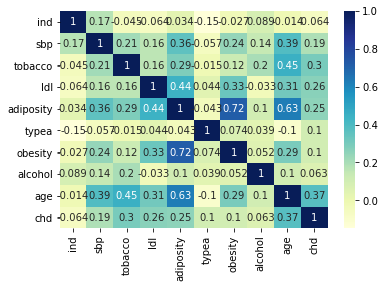

In [28]:
sb.heatmap(data1.corr(), cmap='YlGnBu', annot=True)

Nous constatons que les fortes correalations sont entre chd et tobacco,ldl,adiposity,age.

Application du Gaussian Naîve Bayes

Séparons les données en: entrées (les caractéristiques) et sorties (La pésence de maladie coronarienne: 1 ou 0). Dans notre fichier, la présence de maladie coronarienne (qui est le résultat attendu)  contenue dans la variable chd, et les autres tobacco,idl,adiposity et age,les caractéristiques (les entrées).

In [32]:
X=data1[['tobacco','ldl','adiposity','age']]
y=data1['chd']

In [33]:
from sklearn.naive_bayes import GaussianNB
modele = GaussianNB()
modele.fit(X_train, y_train)

GaussianNB()

Prédiction

In [34]:
y_pred = modele.predict(X_test)

Testons la précision du modèle

In [35]:
from sklearn.metrics import accuracy_score
print( "précision: ", accuracy_score(y_test, y_pred))

précision:  0.7987012987012987


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[94, 11],
       [20, 29]], dtype=int64)

2. Evaluons le modèle

In [38]:
# Cross Validation Classification Accuracy
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.708 (0.047)


In [39]:
# Confusion Matrix
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=7)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)

[[83 19]
 [30 21]]


In [40]:
# Classification Report
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       102
           1       0.53      0.41      0.46        51

    accuracy                           0.68       153
   macro avg       0.63      0.61      0.62       153
weighted avg       0.66      0.68      0.67       153

